In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

### 1. Plot histograms (5 points)

In https://github.com/Serfentum/bf_course/blob/master/14.pandas/train.csv there is information about reads with A, T, G or C in certain position. Plot the histogram of these numbers.

First variant - just built hists for every column separately. Not exactly what we wat but close. 

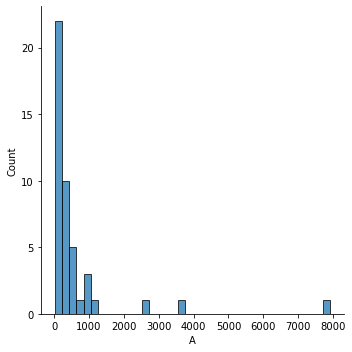

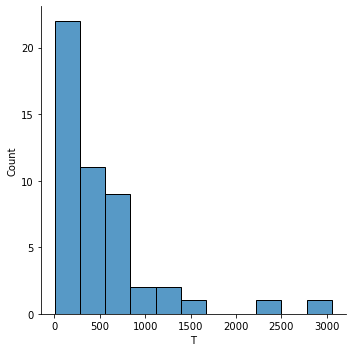

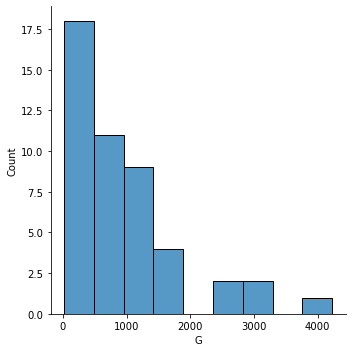

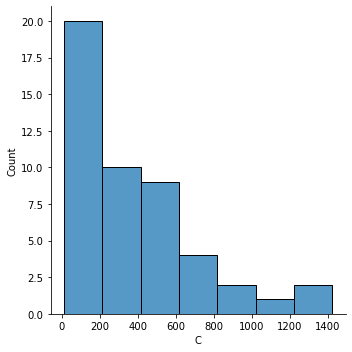

In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv")

sns.displot(train_df , x="A")
sns.displot(train_df , x="T")
sns.displot(train_df , x="G")
sns.displot(train_df , x="C")

We can plot all the histograms on one plot:

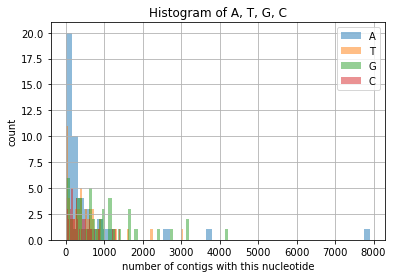

In [18]:
for nucleotide in ['A', 'T', 'G', 'C']: 
    train_df[nucleotide].hist(bins=50, alpha=0.5, label=nucleotide)
plt.legend(loc='upper right')
plt.title('Histogram of A, T, G, C')
plt.xlabel('number of contigs with this nucleotide')
plt.ylabel('count')
plt.show()

###  2. Data selection (5 points)

Save the following part of the data to the file train_part.csv: 
 
  - rows where matches exceeds mean
  - columns pos, reads_all, mismatches, deletions, insertions
Сохраните в файл train_part.csv следующую часть из файла train.csv (из предыдущего задания):
Строки, где matches больше чем среднее
Колонки pos, reads_all, mismatches, deletions, insertions

In [36]:
train_part = train_df.loc[:, ['pos', 'reads_all', 'mismatches', 'insertions']][train_df.mismatches > train_df.mismatches.mean()]
train_part.to_csv('train_part.csv', index=False)

###  3. Perform a small EDA (15 points). 

Explorative Data Analysis of some dataset of your choice. Correlations, distribution plots. 

In [40]:
yersinia = pd.read_csv("./Chromosomes_full.tsv", sep = '\t')

# get rid of the first column that contains indices
yersinia = yersinia.iloc[:, 1:]
yersinia.head()

rec.id                                    rec.description  rec.length  \
0  AE009952.1            Yersinia pestis KIM10+, complete genome     4600755   
1  AE017042.1  Yersinia pestis biovar Microtus str. 91001, co...     4595065   
2  AL590842.1               Yersinia pestis CO92 complete genome     4653728   
3  CP000305.1          Yersinia pestis Nepal516, complete genome     4534590   
4  CP000308.1           Yersinia pestis Antiqua, complete genome     4702289   

   rec.proteins  rec.type rec.shape                                rec.file  \
0          4090         1  circular   GCA_000006645.1_ASM664v1_genomic.gbff   
1          3769         1  circular   GCA_000007885.1_ASM788v1_genomic.gbff   
2          3885         1  circular   GCA_000009065.1_ASM906v1_genomic.gbff   
3          3981         1  circular  GCA_000013805.1_ASM1380v1_genomic.gbff   
4          4167         1  circular  GCA_000013825.1_ASM1382v1_genomic.gbff   

                                            taxonomy species    minGC  \
0  ['Bacteria', 'Proteobacteria', 'Gammaproteobac...  pestis   307400   
1  ['Bacteria', 'Proteobacteria', 'Gammaproteobac...  pestis      400   
2  ['Bacteria', 'Proteobacteria', 'Gammaproteobac...  pestis     1400   
3  ['Bacteria', 'Proteobacteria', 'Gammaproteobac...  pestis  4533400   
4  ['Bacteria', 'Proteobacteria', 'Gammaproteobac...  pestis   112500   

     maxGC  length_replichore1  length_replichore2     ratio  genome_size  \
0  2329100             2021700             2579055  0.783892      4600755   
1  2304500             2304100             2290965  0.994299      4595065   
2  2569300             2567900             2085828  0.812270      4653728   
3  1971100             2562300             1972290  0.769734      4534590   
4  1829900             1717400             2984889  0.575365      4702289   

   disbalance  GCcontent  
0    0.121144      0.476  
1    0.002859      0.477  
2    0.103588      0.476  
3    0.130113      0.476  
4    0.269547      0.477

In [43]:
yersinia.describe()

rec.length  rec.proteins  rec.type         minGC         maxGC  \
count  6.700000e+01     67.000000      67.0  6.700000e+01  6.700000e+01   
mean   4.634254e+06   4024.089552       1.0  2.222675e+06  2.161152e+06   
std    1.170203e+05    152.276337       0.0  1.782097e+06  1.207217e+06   
min    4.367018e+06   3542.000000       1.0  0.000000e+00  3.000000e+02   
25%    4.533326e+06   3968.500000       1.0  3.792000e+05  1.225100e+06   
50%    4.625829e+06   4032.000000       1.0  2.318200e+06  2.164000e+06   
75%    4.695597e+06   4107.000000       1.0  3.936450e+06  2.739650e+06   
max    5.026929e+06   4421.000000       1.0  4.905800e+06  4.706700e+06   

       length_replichore1  length_replichore2      ratio   genome_size  \
count        6.700000e+01        6.700000e+01  67.000000  6.700000e+01   
mean         2.473582e+06        2.160672e+06   0.801356  4.634254e+06   
std          3.936962e+05        4.202481e+05   0.178944  1.170203e+05   
min          1.717400e+06        8.775250e+05   0.235274  4.367018e+06   
25%          2.234000e+06        2.006345e+06   0.789040  4.533326e+06   
50%          2.457000e+06        2.207033e+06   0.841755  4.625829e+06   
75%          2.560100e+06        2.454571e+06   0.900436  4.695597e+06   
max          3.729800e+06        2.984889e+06   0.994299  5.026929e+06   

       disbalance  GCcontent  
count   67.000000  67.000000  
mean     0.124045   0.475836  
std      0.141802   0.000567  
min      0.002859   0.475000  
25%      0.052398   0.475500  
50%      0.085921   0.476000  
75%      0.117918   0.476000  
max      0.619074   0.477000

In [44]:
yersinia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rec.id              67 non-null     object 
 1   rec.description     67 non-null     object 
 2   rec.length          67 non-null     int64  
 3   rec.proteins        67 non-null     int64  
 4   rec.type            67 non-null     int64  
 5   rec.shape           67 non-null     object 
 6   rec.file            67 non-null     object 
 7   taxonomy            67 non-null     object 
 8   species             67 non-null     object 
 9   minGC               67 non-null     int64  
 10  maxGC               67 non-null     int64  
 11  length_replichore1  67 non-null     int64  
 12  length_replichore2  67 non-null     int64  
 13  ratio               67 non-null     float64
 14  genome_size         67 non-null     int64  
 15  disbalance          67 non-null     float64
 16  GCcontent 

In [51]:
yersinia['rec.shape'].unique()
yersinia['rec.type'].unique() 
yersinia['species'].unique() 

array(['pestis', 'pseudotuberculosis'], dtype=object)

Only circular chromosomes are present (and all have type = 1), so we are not going to look into the distribution of chroosome shapes and type. However, there are 2 different species. 

In [52]:
yersinia.columns

Index(['rec.id', 'rec.description', 'rec.length', 'rec.proteins', 'rec.type',
       'rec.shape', 'rec.file', 'taxonomy', 'species', 'minGC', 'maxGC',
       'length_replichore1', 'length_replichore2', 'ratio', 'genome_size',
       'disbalance', 'GCcontent'],
      dtype='object')

Distribution plots:

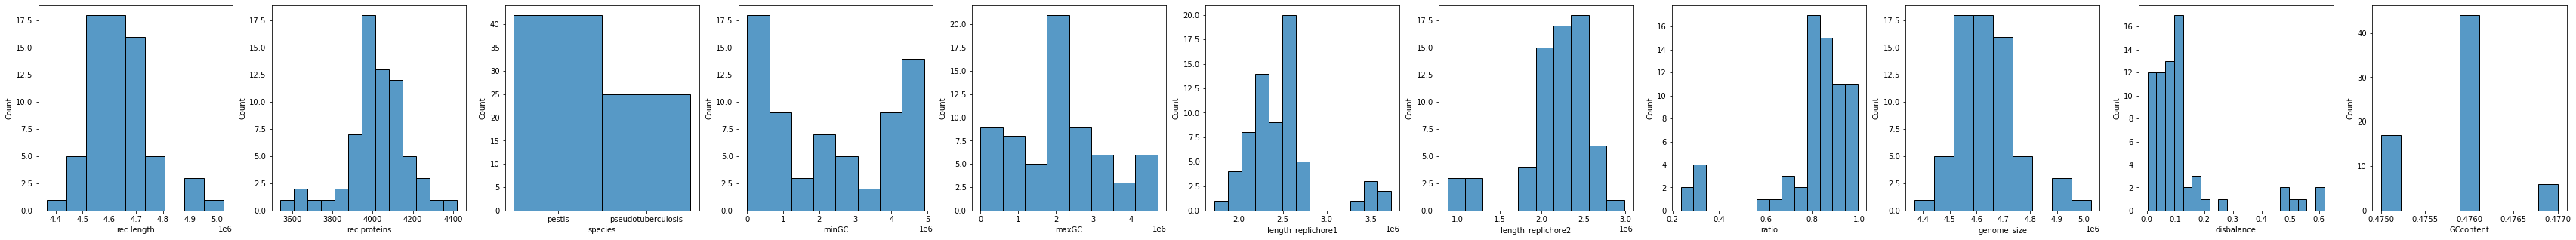

In [55]:
f, axes = plt.subplots(figsize=(60,5), nrows=1, ncols=11)
features = ['rec.length', 'rec.proteins','species', 'minGC', 'maxGC','length_replichore1', 'length_replichore2', 'ratio', 'genome_size',
       'disbalance', 'GCcontent']
for feature in range (11):
    axes_number = axes[feature]
    sns.histplot(x=yersinia[features[feature]], ax=axes_number)

We can do even all columns versus all other coluns. I have a feeling there was one simple function for that, but I do not remember it now (maybe it was in R?). So I am going to write my own custom function. I manually select the columns of interest right now, but I could use `yersinia.select_dtypes(include=[np.number])`

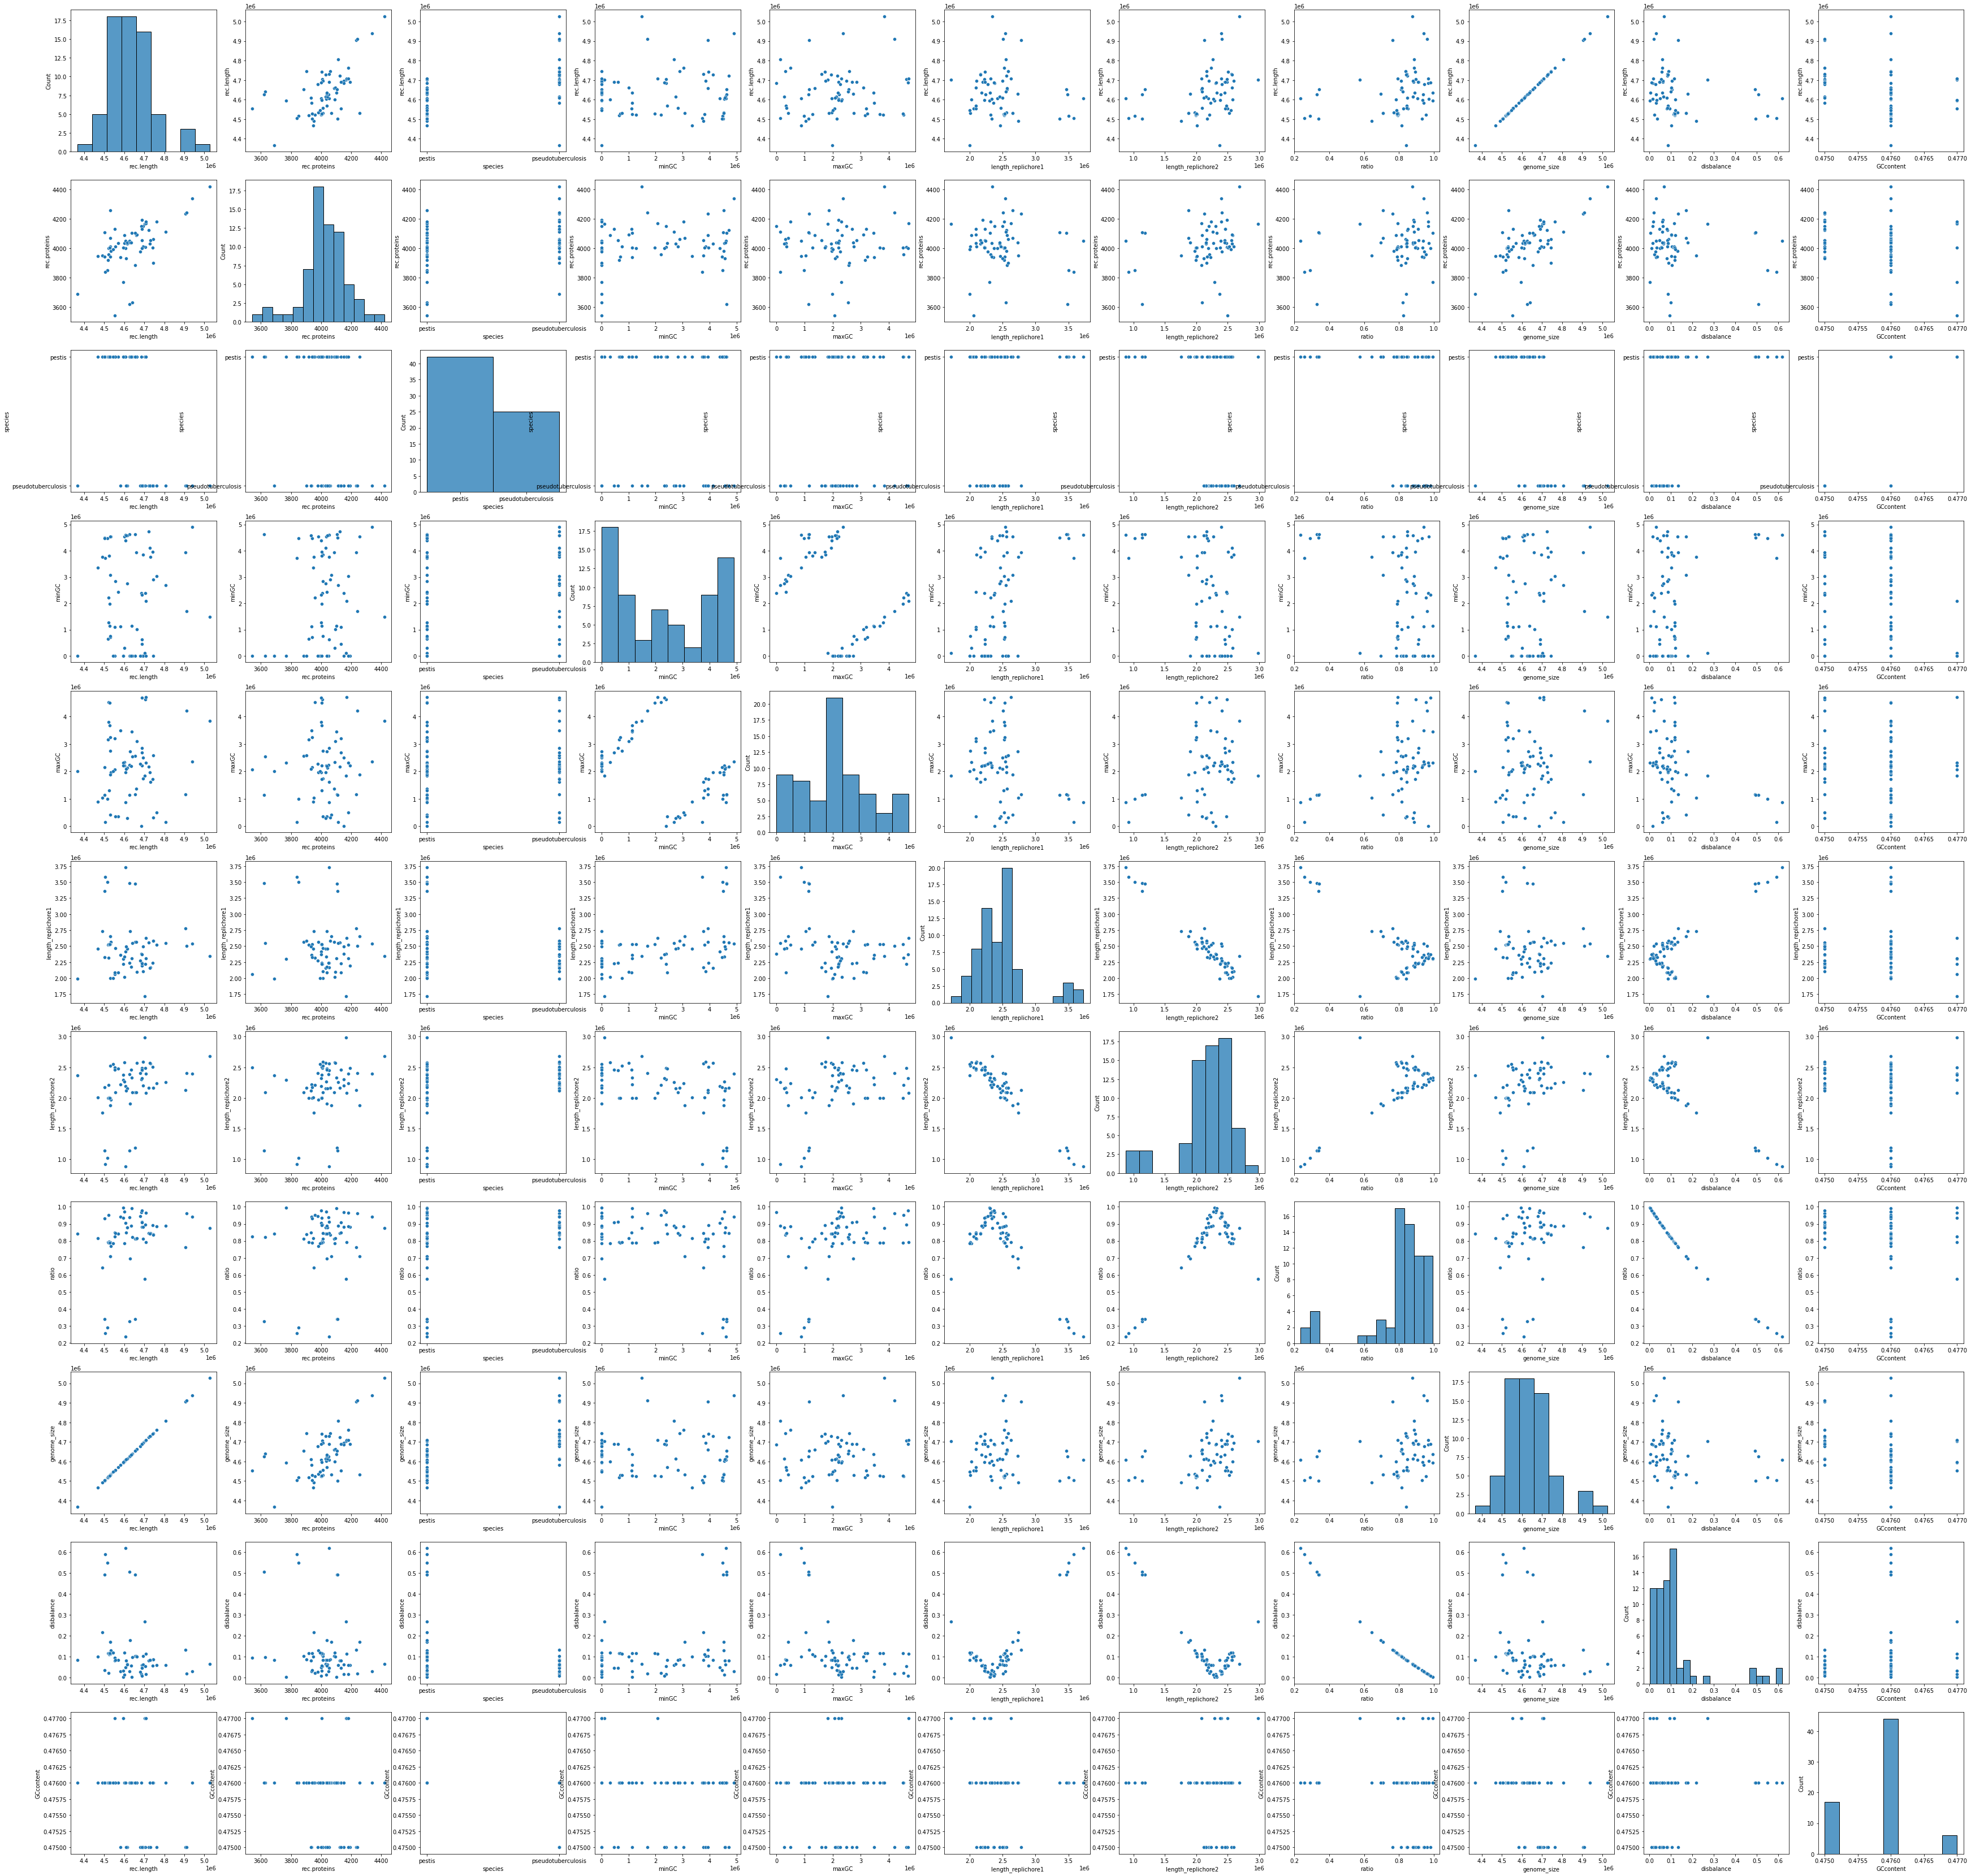

In [63]:
f, axes = plt.subplots(figsize=(60,60), nrows=11, ncols=11)
features = ['rec.length', 'rec.proteins','species', 'minGC', 'maxGC','length_replichore1', 'length_replichore2', 'ratio', 'genome_size',
       'disbalance', 'GCcontent']
used_features = []
for feature in range (11):
    for feature2 in range (11):
        axes_number = axes[feature, feature2]
        if feature == feature2: 
            sns.histplot(x=yersinia[features[feature]], ax=axes_number)
        else: 
            sns.scatterplot(data=yersinia, y=features[feature], x=features[feature2], ax=axes_number)

Here, we can see a couple of interesting things. 

Genome size and chromosome length have perfect correlation - every yersinia has only one chromosome. 
Rec proteins and rec length seem to correlate but not so much. 
Y. pseudotuberculosis has longer genomes with more proteins, lower GC-content (but not so different) and less disbalance. 
MinGC and MaxGc have 2 parallell lines on the plot - not sure what could it mean biologically, probably correspond to two different species. 
Dibalance is a functiom of ratio. 

To see the correlation, we can also plot the correlation matrix: 

In [64]:
corr = yersinia.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

C:\Users\emeli\anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\emeli\anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


There is also a cheat code - we can't use it in this homework but it produces a pretty html report. 

In [65]:
import pandas_profiling as pp
pp.ProfileReport(yersinia) 